In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.keras.backend as K
import sys
import datetime
from tensorflow.python.client import device_lib

from sificc_lib import AI, Utils_new, Event_new, Simulation_new, root_files, DataModel_new
np.set_printoptions(precision=2, linewidth=85, suppress=True)

%matplotlib inline

In [2]:
# Check used versions
now = datetime.datetime.now()
print("Date-time           ", now)
print("Tf version:         ", keras.__version__)
print("Numpy version:      ", np.__version__)
print("Python              ", sys.executable)
print("Python version      ", sys.version)
print("GPU devices:        ", device_lib.list_local_devices())

Date-time            2021-08-02 12:54:08.315384
Tf version:          2.3.0-tf
Numpy version:       1.19.1
Python               /net/software_g4rt/anaconda3/envs/condaenv-sificcnn/bin/python
Python version       3.7.9 (default, Aug 31 2020, 12:42:55) 
[GCC 7.3.0]
GPU devices:         [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9109269028495670225
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6606037058960601216
physical_device_desc: "device: XLA_CPU device"
]


In [3]:
# model name
model_name = 'model-2b-lsr-new-real'

shuffle_clusters = False

# load the training data
data = DataModel_new('data-new-complete-real.npz', 
                 batch_size = 128, validation_percent = .05, test_percent = .1)

# append an extra dimention to the features since we are using convolutional layers
data.append_dim = True

# create an AI instance
ai = AI(data, model_name)

ai.weight_type = 2
ai.weight_pos_x = 2.5
ai.weight_pos_y = 1
ai.weight_pos_z = 2
ai.weight_energy = 1.5
ai.weight_e_cluster = 1
ai.weight_p_cluster = 1

# randomly shuffle the training data
#np.random.seed(888)
#ai.data.shuffle(only_train=False)

# shuffle the clusters within each event
if shuffle_clusters:
    ai.data.shuffle_training_clusters()

In [4]:
# define and create the neural network architecture
ai.create_model(conv_layers=[128, 64], classifier_layers=[32], type_layers=[8], 
                pos_layers=[64,32], energy_layers=[32, 16], base_l2=.0001, limbs_l2=.0001)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 72, 1)]      0                                            
__________________________________________________________________________________________________
conv_1 (Conv1D)                 (None, 8, 128)       1280        inputs[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv1D)                 (None, 8, 64)        8256        conv_1[0][0]                     
__________________________________________________________________________________________________
flatting (Flatten)              (None, 512)          0           conv_2[0][0]                     
______________________________________________________________________________________________

In [5]:
# compile the ai
ai.compile_model(learning_rate=0.0003)

# define the learning rate scheduler for the training phase
def lr_scheduler(epoch):
    if epoch < 90:
        return .0003
    elif epoch < 160:
        return .0001
    elif epoch < 180:
        return .00003
    elif epoch < 190:
        return .00001
    else:
        return .000003
l_callbacks = [
    keras.callbacks.LearningRateScheduler(lr_scheduler),
]

In [6]:
#LOADING after training
#ai.load(model_name, optimizer=False)
#ai.compile_model()

In [7]:
#TRAINING

In [8]:
%%time
# start the training
#ai.train(epochs=200, shuffle=True, shuffle_clusters=shuffle_clusters, verbose=0, callbacks = l_callbacks)

# evaluate the AI on the training set
#ai.model.evaluate(ai.data.train_x, ai.data.train_y, verbose=1)
print()

9737/9737 [==============================] - 16s 2ms/step - loss: 3.9236 - e_cluster_loss: 0.0262 - p_cluster_loss: 0.0877 - type_loss: 0.2788 - pos_x_loss: 0.0677 - pos_y_loss: 1.4609 - pos_z_loss: 0.0451 - energy_loss: 0.9612 - e_cluster__cluster_accuracy: 0.9637 - p_cluster__cluster_accuracy: 0.8683 - type__type_accuracy: 0.8783 - type__type_tp_rate: 0.8162

CPU times: user 11h 6min 5s, sys: 1h 15min 39s, total: 12h 21min 45s
Wall time: 8h 19min 42s


In [6]:
ai.load(model_name, optimizer=False)

In [7]:
ai.evaluate() # 2*5mm in y direction

AI model
  Loss:        3.95243
    -Type:         0.28720 *  2.00 = 0.57439
    -Pos X:        0.05662 *  2.50 = 0.14155
    -Pos Y:        1.44474 *  1.00 = 1.44474
    -Pos Z:        0.04436 *  2.00 = 0.08873
    -Energy:       0.99142 *  1.50 = 1.48713
    -Cls e:        0.03167 *  1.00 = 0.03167
    -Cls p:        0.09436 *  1.00 = 0.09436
  Accuracy:    0.87469
    -TP rate:      0.81330
    -Cls e rate:   0.95734
    -Cls p rate:   0.85679
  Efficiency:  0.10272
  Purity:      0.09320
  Euc mean:   10.87081
  Euc std:    18.64127

Reco
  Accuracy:    0.66020
    -TP rate:      0.38138
  Efficiency:  0.03117
  Purity:      0.02961
  Euc mean:   21.00924
  Euc std:    44.44767


In [7]:
ai.evaluate() # 2*10 mm in y direction

AI model
  Loss:        3.95243
    -Type:         0.28720 *  2.00 = 0.57439
    -Pos X:        0.05662 *  2.50 = 0.14155
    -Pos Y:        1.44474 *  1.00 = 1.44474
    -Pos Z:        0.04436 *  2.00 = 0.08873
    -Energy:       0.99142 *  1.50 = 1.48713
    -Cls e:        0.03167 *  1.00 = 0.03167
    -Cls p:        0.09436 *  1.00 = 0.09436
  Accuracy:    0.87469
    -TP rate:      0.81330
    -Cls e rate:   0.95734
    -Cls p rate:   0.85679
  Efficiency:  0.17127
  Purity:      0.15539
  Euc mean:   10.87081
  Euc std:    18.64127

Reco
  Accuracy:    0.66020
    -TP rate:      0.38138
  Efficiency:  0.05851
  Purity:      0.05559
  Euc mean:   21.00924
  Euc std:    44.44767


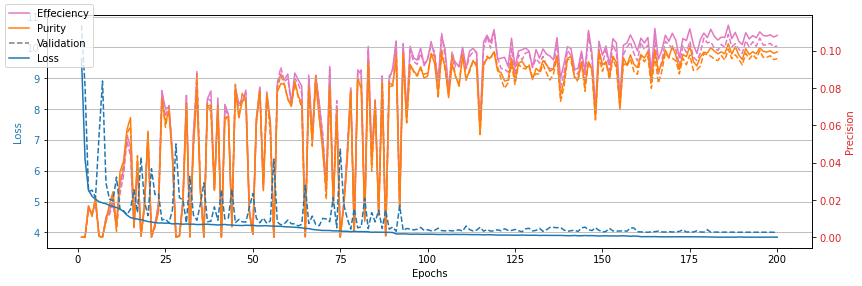

In [8]:
# plot the training loss
ai.plot_training_loss(smooth=False)

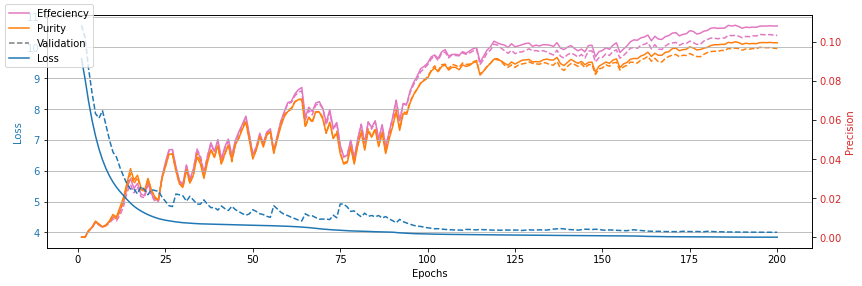

In [10]:
ai.plot_training_loss(smooth=True)

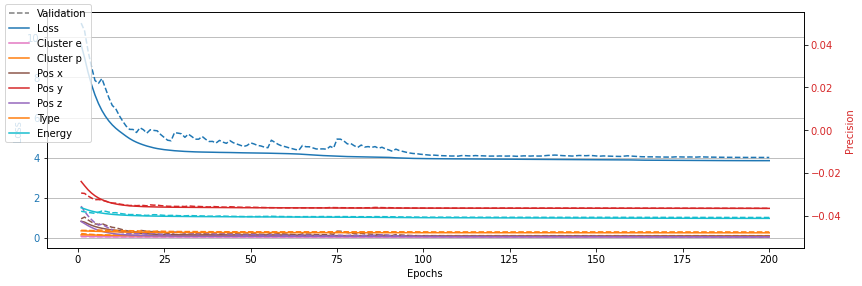

In [9]:
ai.plot_training_loss(mode = 'loss')

 0.17127 Total efficiency
 0.15539 Total purity
 36654 All valid events
  1654 Correctly recon./ident. events
  9657 All true Compton events
 10644 NN pred Compton events
  7854 NN type-matched events
    6200 Type matched, pos energy mismatched 
    5657 Type and pos matched 
    2171 Type and energy matched 


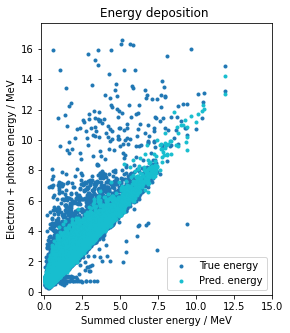

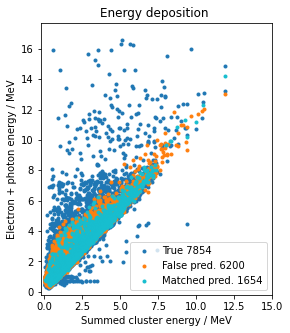

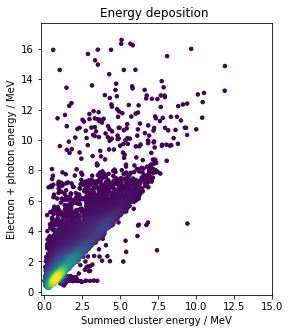

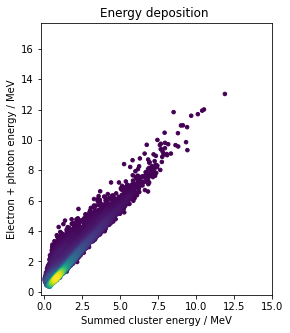

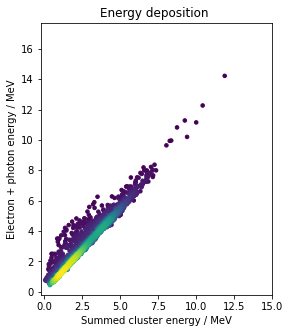

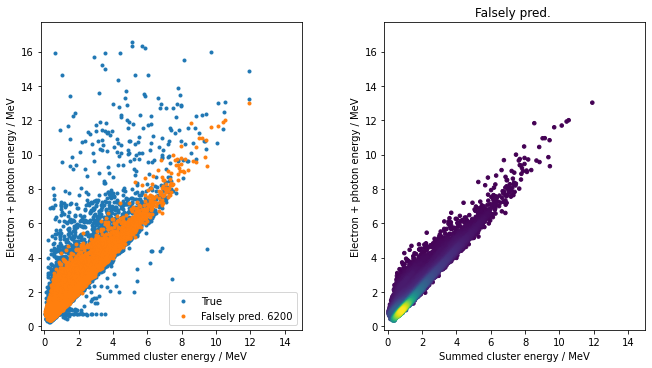

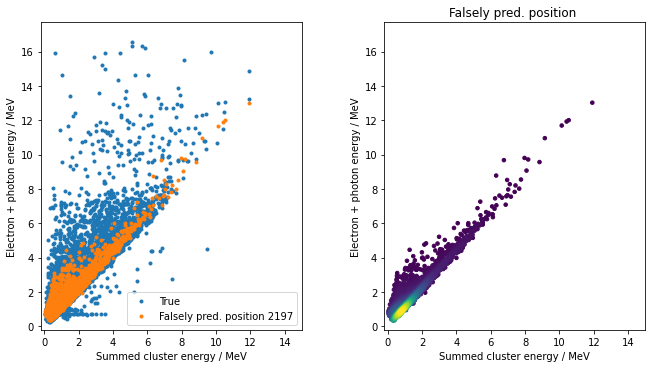

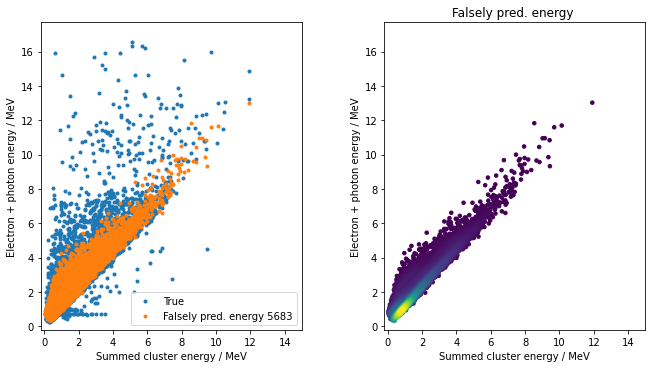

 Prediction of x positions 
7854.00000 Matched type number 
5657.00000 Matched position number 
5657.00000 Matched position number and matched type
 0.72027 Matched position from matched type 
    7843 Pred e in scatterer 
       4 Pred p in scatterer 
    7781 Matched e in scat 
       2 Matched p in scat 
    7788 True e in scatterer 
      66 True p in scatterer 
      66 True e in abs 
    7788 True p in abs 
       5 Pred e in abs 
    7813 Pred p in abs 
       3 Matched e in abs 
    7753 Matched p in abs 



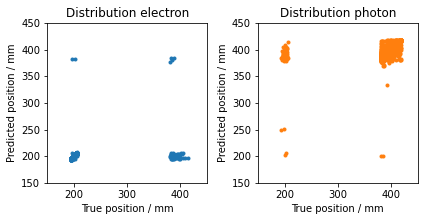

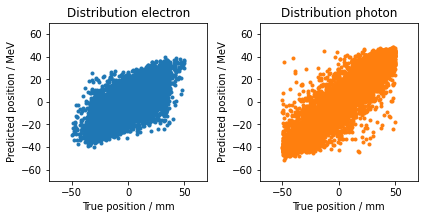

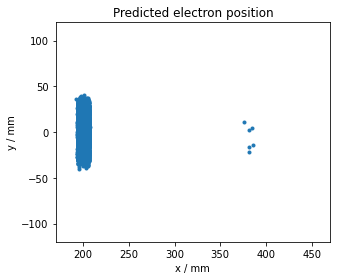

In [8]:
ai.savefigpath = '/home/home2/institut_3b/profe/Data/SiFiCCNN/NewSim/model-2b-lsr/EnergyDeposition/'
ai.events_prediction_analysis('all-events', save = True)

 0.17127 Total efficiency
 0.15539 Total purity
 36654 All valid events
  1654 Correctly recon./ident. events
  9657 All true Compton events
 10644 NN pred Compton events
  7854 NN type-matched events
    2986 Type matched, pos energy mismatched 
    2702 Type and pos matched 
     686 Type and energy matched 


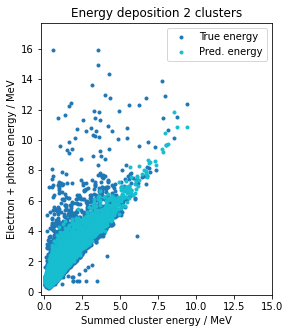

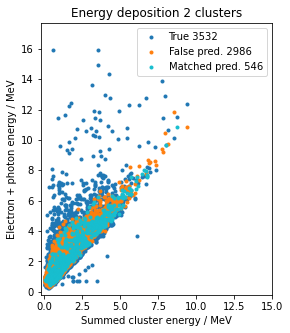

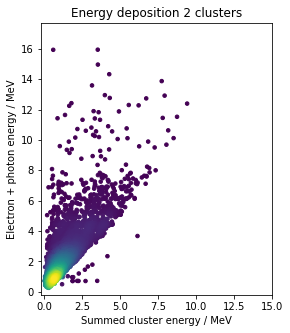

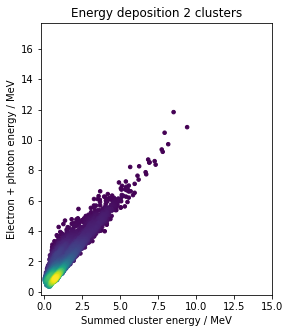

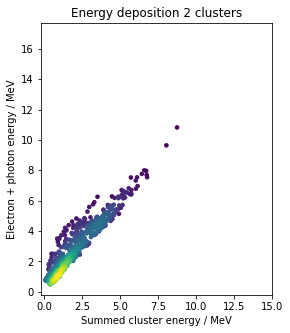

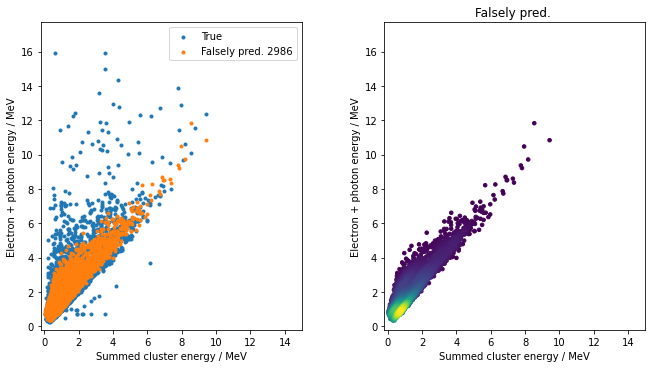

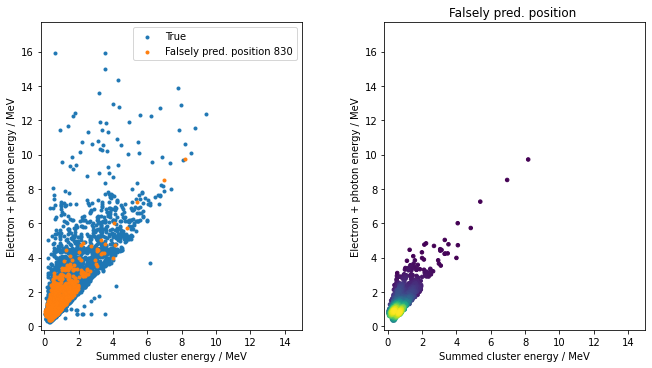

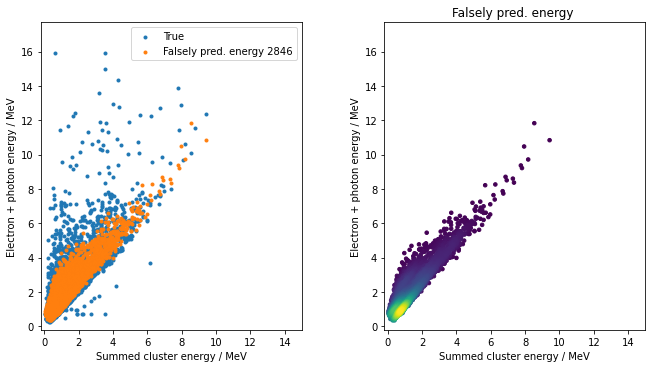

 Prediction of x positions 
3532.00000 Matched type number 
2702.00000 Matched position number 
2702.00000 Matched position number and matched type
 0.76501 Matched position from matched type 
    3528 Pred e in scatterer 
       3 Pred p in scatterer 
    3495 Matched e in scat 
       2 Matched p in scat 
    3497 True e in scatterer 
      35 True p in scatterer 
      35 True e in abs 
    3497 True p in abs 
       3 Pred e in abs 
    3528 Pred p in abs 
       2 Matched e in abs 
    3495 Matched p in abs 
    1891 Type matched, pos energy mismatched 
    1734 Type and pos matched 
     760 Type and energy matched 


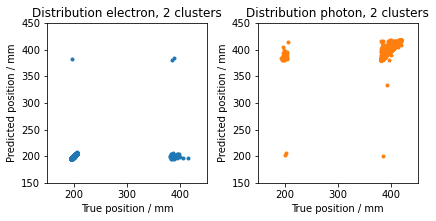

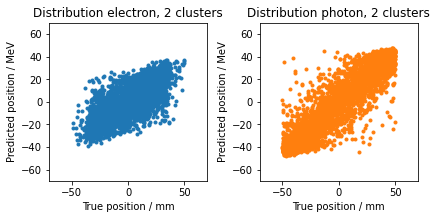

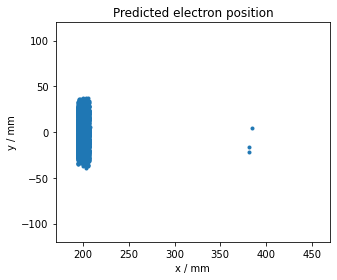

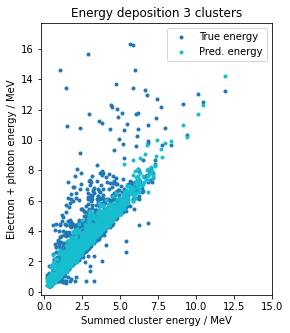

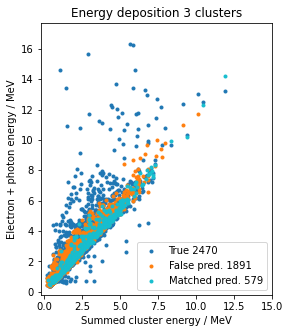

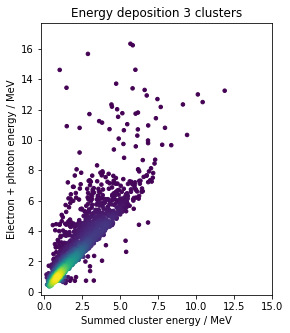

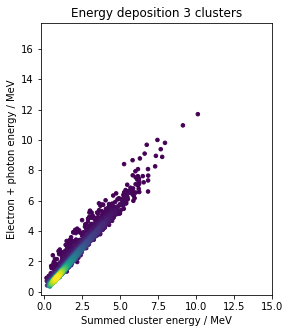

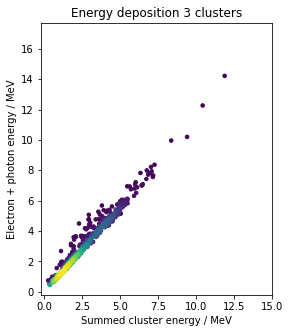

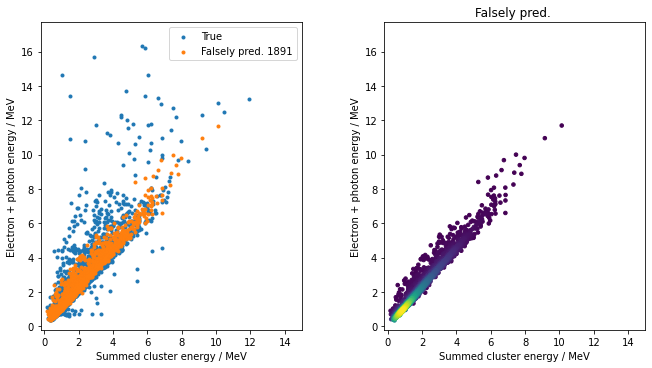

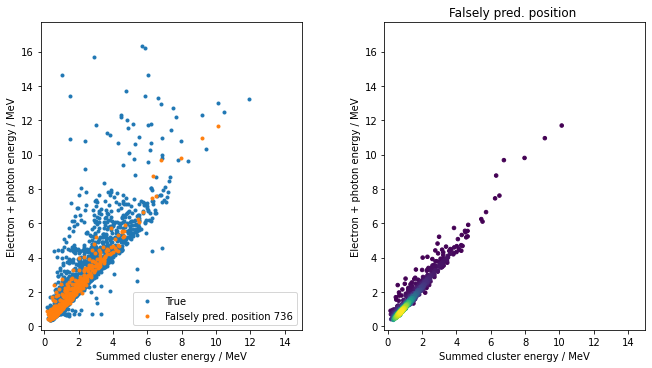

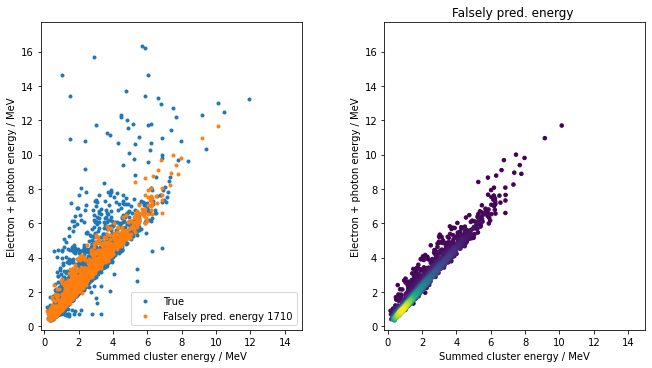

 Prediction of x positions 
2470.00000 Matched type number 
1734.00000 Matched position number 
1734.00000 Matched position number and matched type
 0.70202 Matched position from matched type 
    2466 Pred e in scatterer 
       1 Pred p in scatterer 
    2455 Matched e in scat 
       0 Matched p in scat 
    2457 True e in scatterer 
      13 True p in scatterer 
      13 True e in abs 
    2457 True p in abs 
       2 Pred e in abs 
    2452 Pred p in abs 
       1 Matched e in abs 
    2442 Matched p in abs 
     878 Type matched, pos energy mismatched 
     827 Type and pos matched 
     483 Type and energy matched 


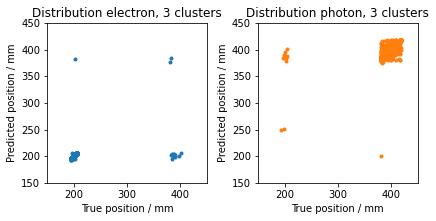

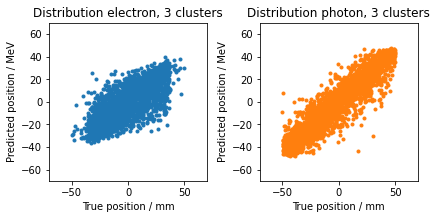

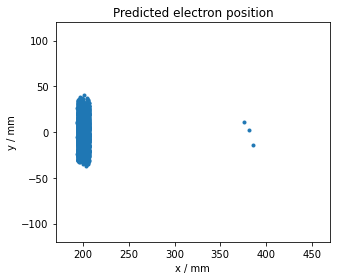

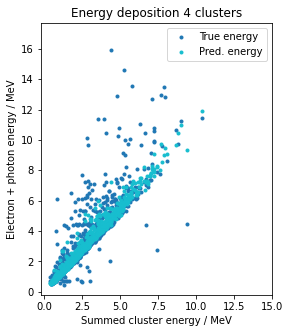

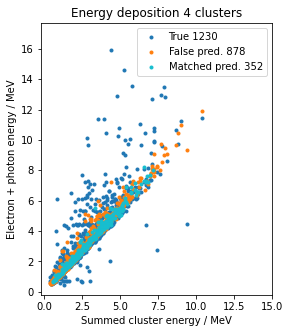

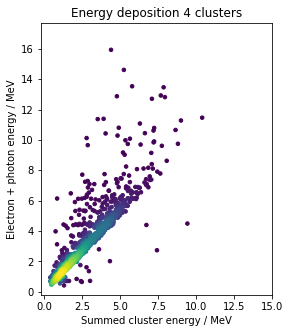

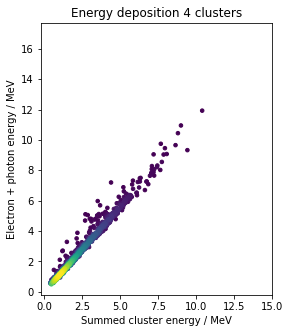

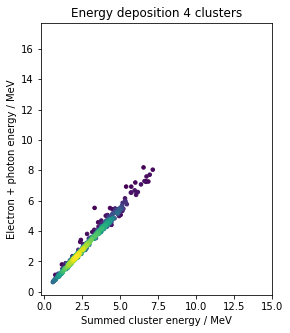

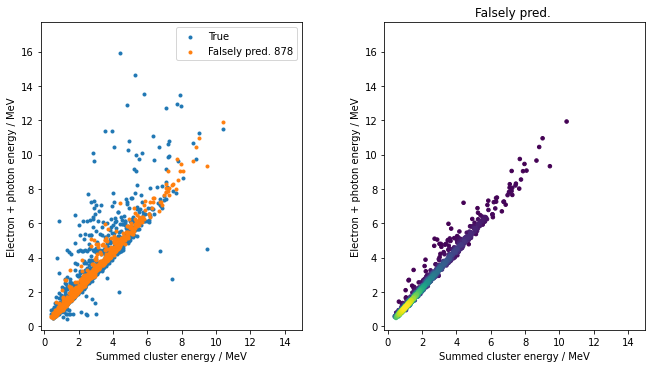

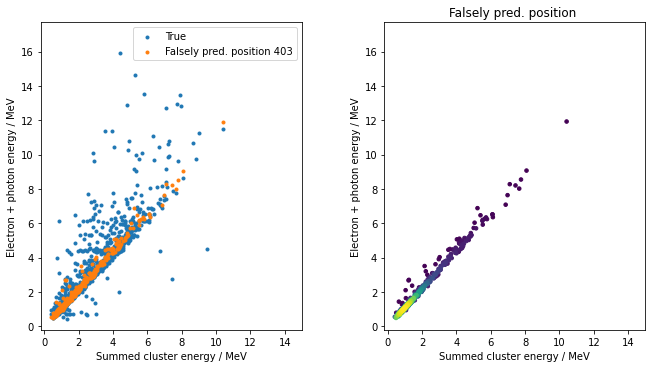

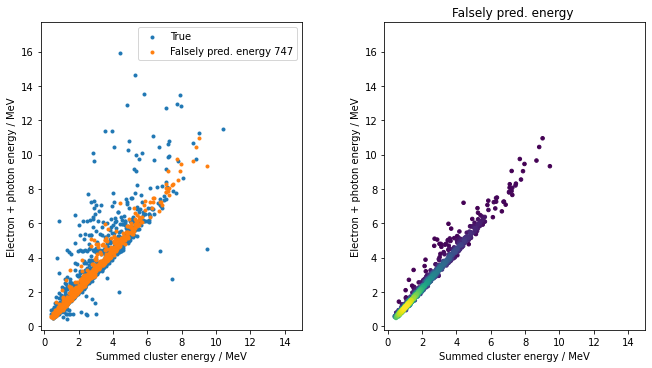

 Prediction of x positions 
1230.00000 Matched type number 
827.00000 Matched position number 
827.00000 Matched position number and matched type
 0.67236 Matched position from matched type 
    1229 Pred e in scatterer 
       0 Pred p in scatterer 
    1214 Matched e in scat 
       0 Matched p in scat 
    1215 True e in scatterer 
      15 True p in scatterer 
      15 True e in abs 
    1215 True p in abs 
       0 Pred e in abs 
    1218 Pred p in abs 
       0 Matched e in abs 
    1204 Matched p in abs 
     284 Type matched, pos energy mismatched 
     263 Type and pos matched 
     168 Type and energy matched 


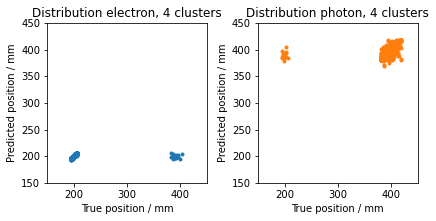

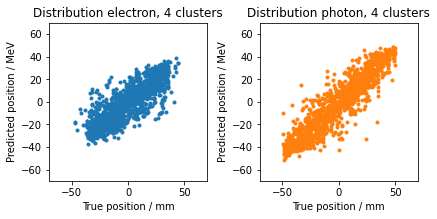

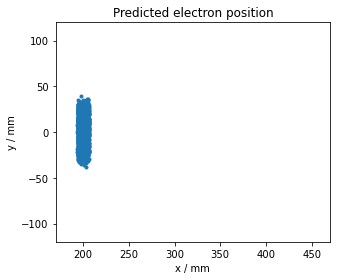

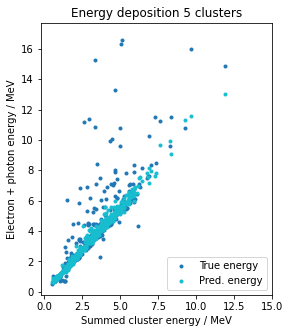

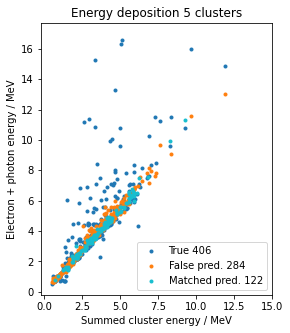

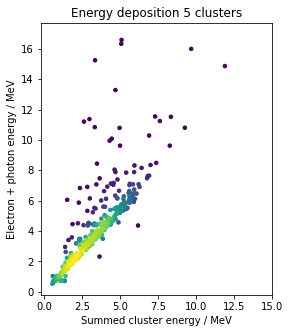

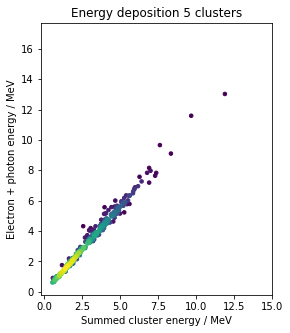

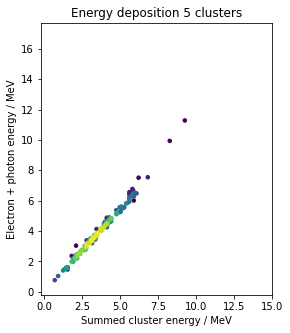

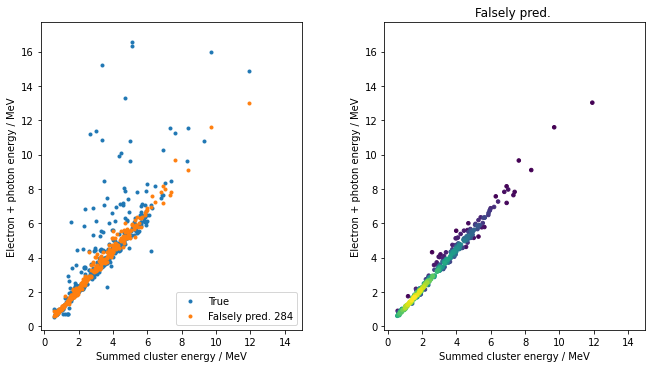

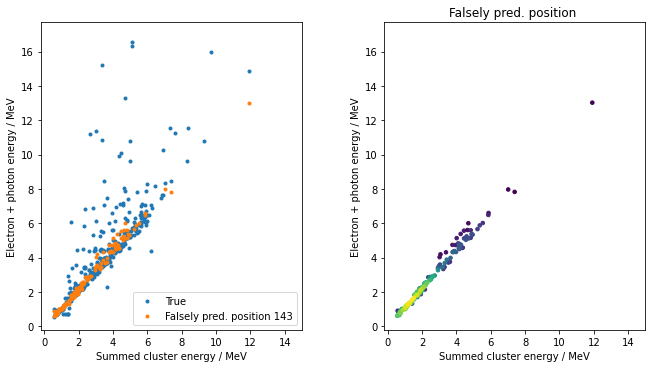

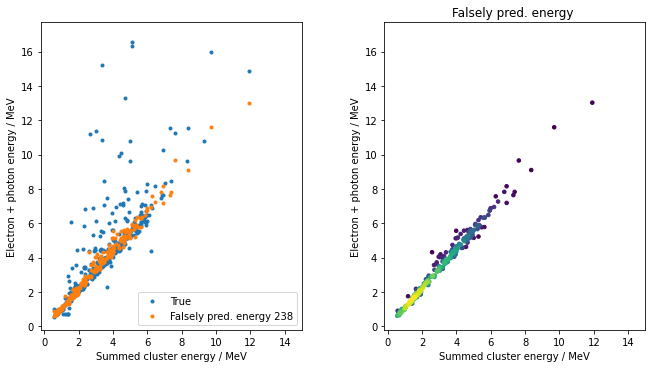

 Prediction of x positions 
406.00000 Matched type number 
263.00000 Matched position number 
263.00000 Matched position number and matched type
 0.64778 Matched position from matched type 
     404 Pred e in scatterer 
       0 Pred p in scatterer 
     403 Matched e in scat 
       0 Matched p in scat 
     405 True e in scatterer 
       1 True p in scatterer 
       1 True e in abs 
     405 True p in abs 
       0 Pred e in abs 
     402 Pred p in abs 
       0 Matched e in abs 
     401 Matched p in abs 
      80 Type matched, pos energy mismatched 
      70 Type and pos matched 
      54 Type and energy matched 


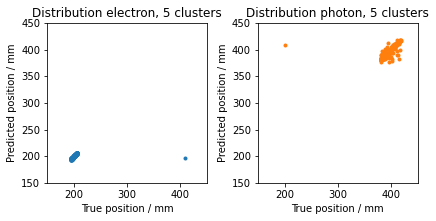

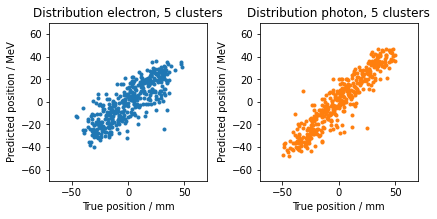

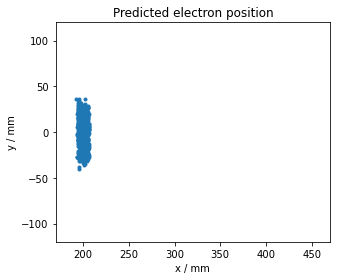

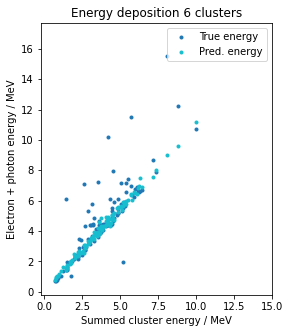

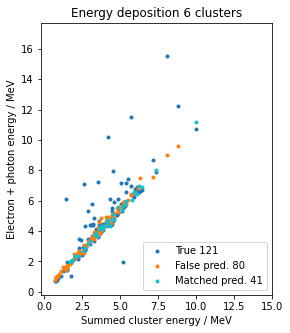

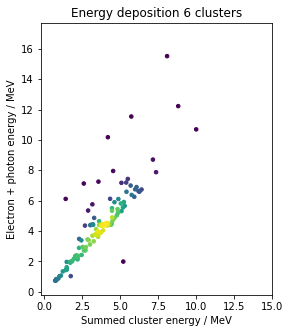

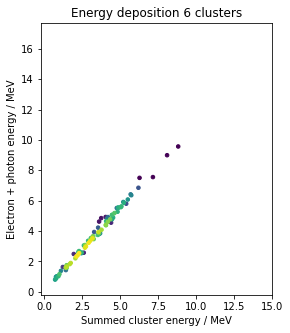

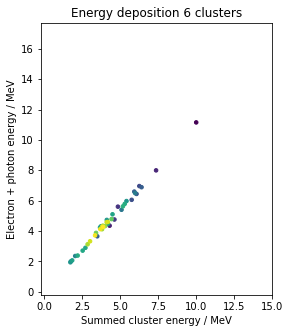

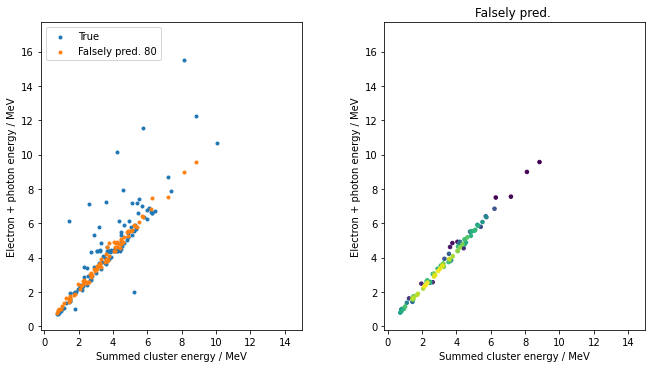

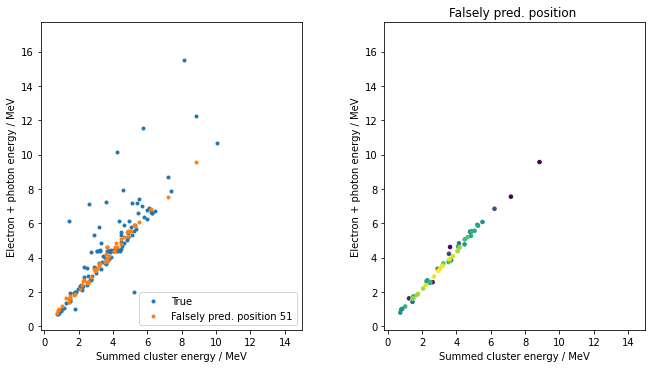

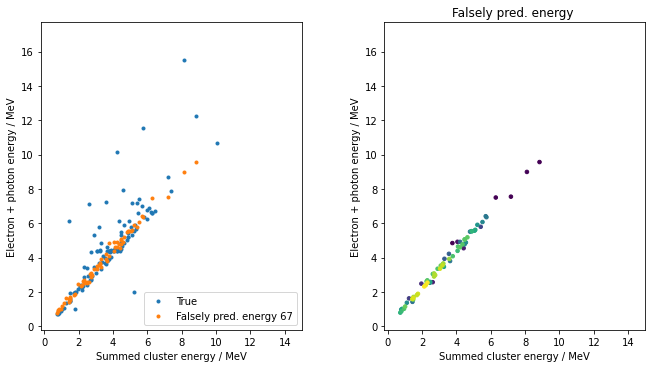

 Prediction of x positions 
121.00000 Matched type number 
70.00000 Matched position number 
70.00000 Matched position number and matched type
 0.57851 Matched position from matched type 
     121 Pred e in scatterer 
       0 Pred p in scatterer 
     121 Matched e in scat 
       0 Matched p in scat 
     121 True e in scatterer 
       0 True p in scatterer 
       0 True e in abs 
     121 True p in abs 
       0 Pred e in abs 
     119 Pred p in abs 
       0 Matched e in abs 
     119 Matched p in abs 
      21 Type matched, pos energy mismatched 
      15 Type and pos matched 
       8 Type and energy matched 


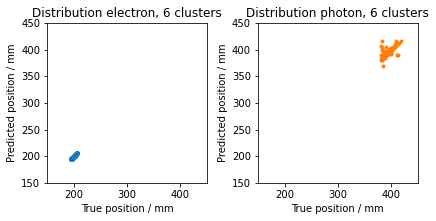

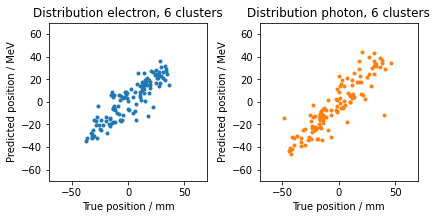

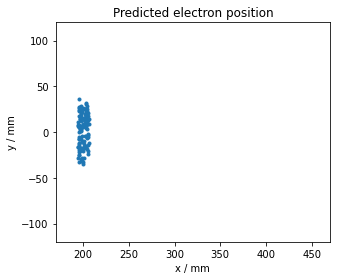

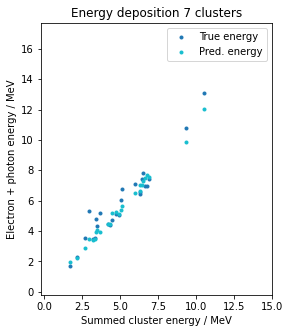

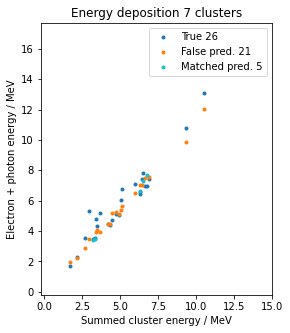

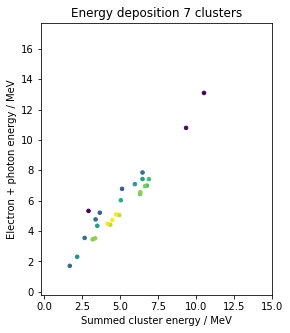

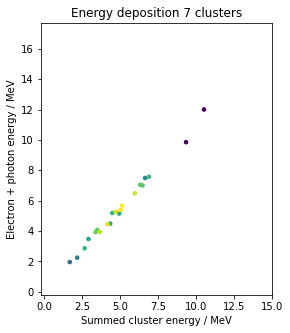

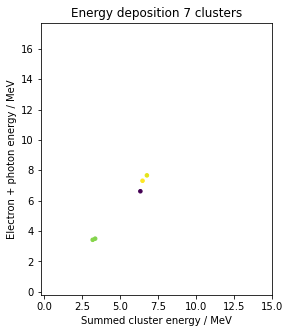

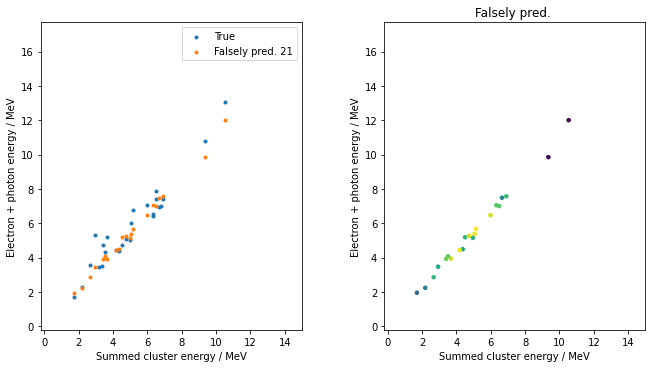

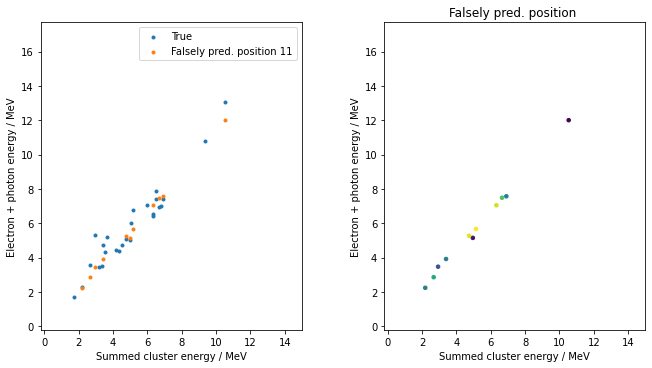

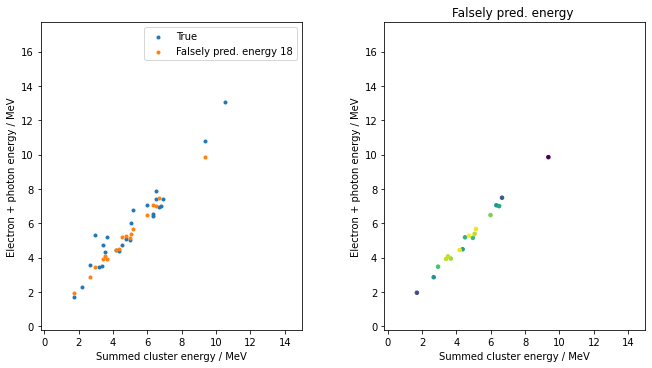

 Prediction of x positions 
26.00000 Matched type number 
15.00000 Matched position number 
15.00000 Matched position number and matched type
 0.57692 Matched position from matched type 
      26 Pred e in scatterer 
       0 Pred p in scatterer 
      26 Matched e in scat 
       0 Matched p in scat 
      26 True e in scatterer 
       0 True p in scatterer 
       0 True e in abs 
      26 True p in abs 
       0 Pred e in abs 
      26 Pred p in abs 
       0 Matched e in abs 
      26 Matched p in abs 
      11 Type matched, pos energy mismatched 
       6 Type and pos matched 
       7 Type and energy matched 


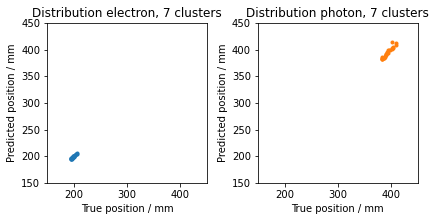

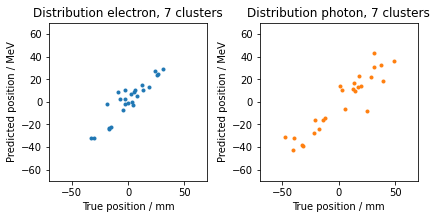

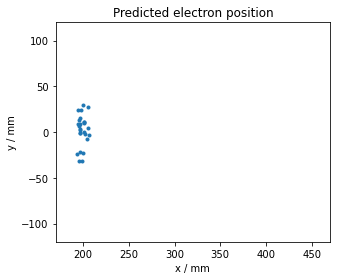

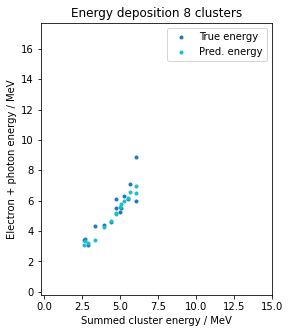

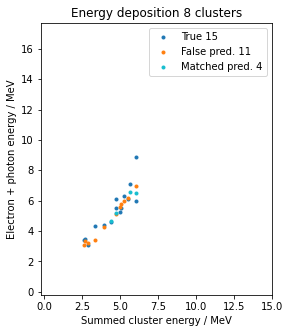

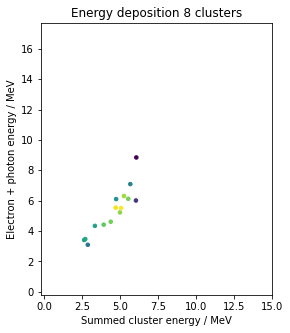

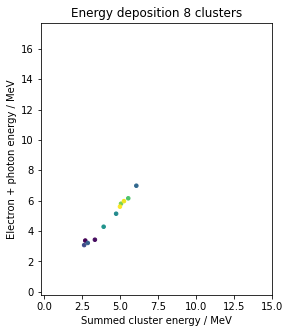

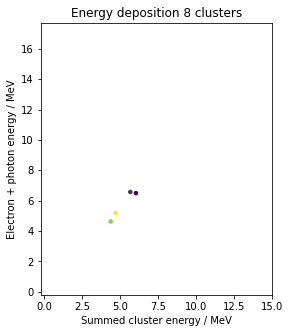

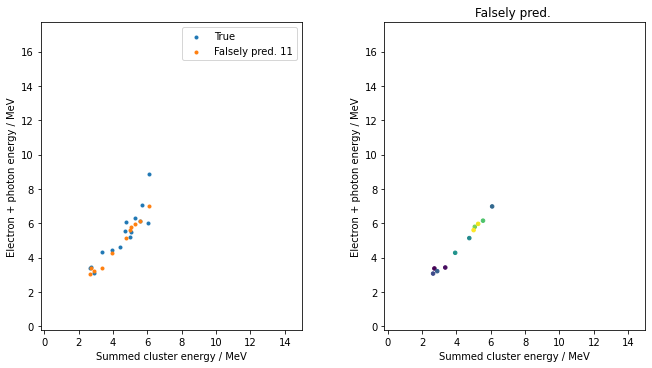

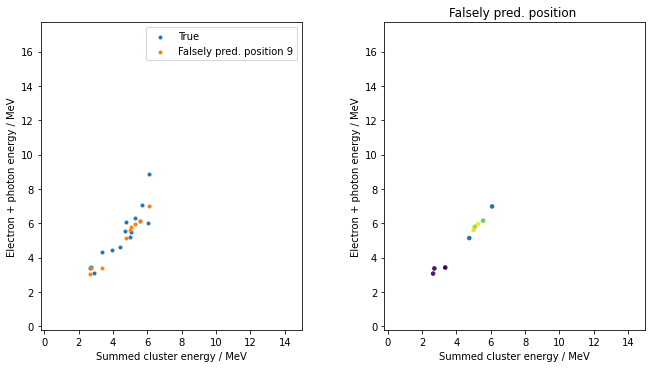

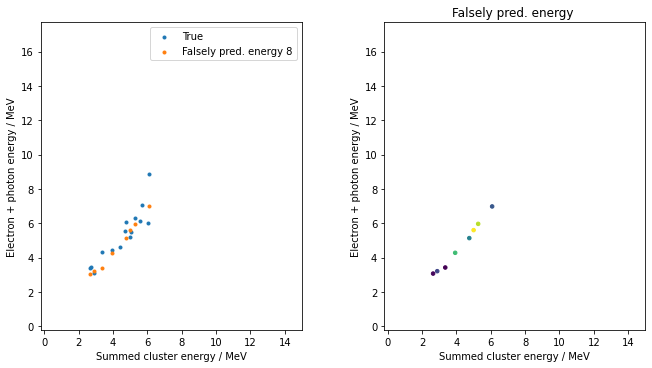

 Prediction of x positions 
15.00000 Matched type number 
 6.00000 Matched position number 
 6.00000 Matched position number and matched type
 0.40000 Matched position from matched type 
      15 Pred e in scatterer 
       0 Pred p in scatterer 
      14 Matched e in scat 
       0 Matched p in scat 
      14 True e in scatterer 
       1 True p in scatterer 
       1 True e in abs 
      14 True p in abs 
       0 Pred e in abs 
      14 Pred p in abs 
       0 Matched e in abs 
      13 Matched p in abs 


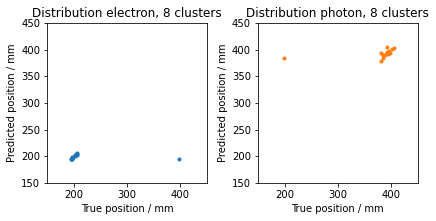

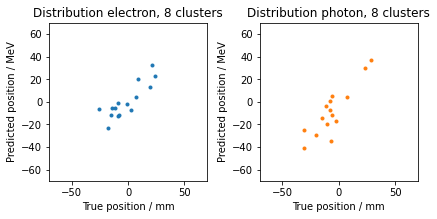

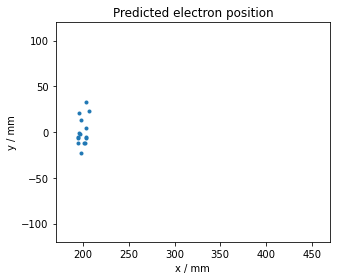

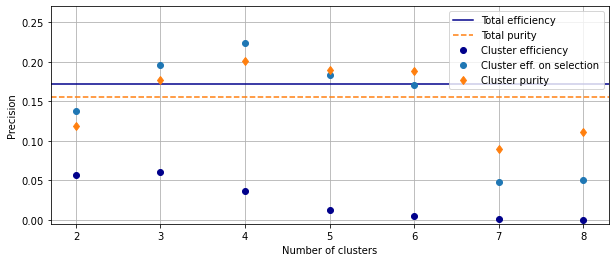

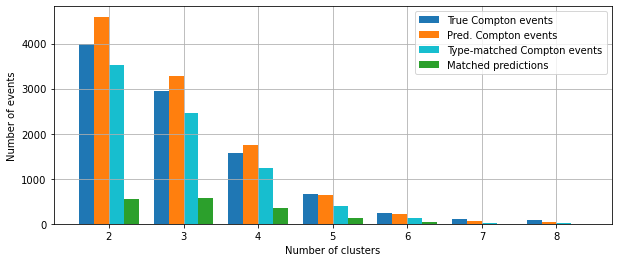

In [9]:
ai.events_prediction_analysis('cluster-numbers')

In [14]:
#ai.events_prediction_analysis('cluster-distribution')

In [15]:
#ai.events_prediction_analysis('e-scatterer')

In [16]:
# save the trained model
#ai.save(file_name = model_name)

In [17]:
#ai.load(model_name, optimizer=False)